In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### to classification

In [5]:
data=pd.read_csv('transformed_data.csv')

<Axes: xlabel='LogReturn', ylabel='Count'>

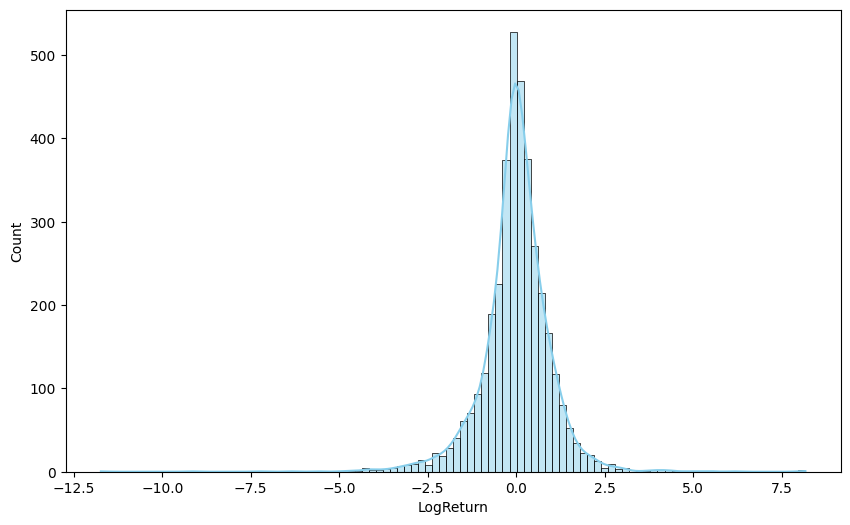

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['LogReturn'], bins=100, kde=True, color='skyblue')

In [8]:
data_class=data.copy()
data_class['LogReturn']=(data['LogReturn'] > 0).astype(int)

### Train test

In [15]:
data_class['date']=pd.to_datetime(data_class['date'])

In [21]:
data_class = data_class.loc[data_class['date'].dt.year < 2019]

In [30]:
X=data_class.drop(['LogReturn','date'],axis=1)
Y=data_class['LogReturn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 48.75%


In [33]:
X.columns

Index(['gdp', 'interest_rate', 'unemployment', 'cpi', 'pce',
       'nonfarm_payrolls', 'corporate_profits', 'money_supply',
       'consumer_confidence', 'housing_starts', 'permits',
       'interest_rate_lag1', 'unemployment_lag1', 'cpi_lag1', 'pce_lag1',
       'interest_rate_roll3_mean', 'interest_rate_roll3_std', 'cpi_roll3_mean',
       'cpi_roll3_std', 'interest_x_cpi', 'unemp_x_gdp', 'month_sin',
       'month_cos', 'dayofweek_sin', 'dayofweek_cos', 'dayofmonth_sin',
       'dayofmonth_cos', 'dayofyear_sin', 'dayofyear_cos', 'LogReturn_lag1',
       'LogReturn_lag2', 'LogReturn_lag3', 'LogReturn_lag4', 'LogReturn_lag5',
       'LogReturn_lag6', 'LogReturn_lag7', 'LogReturn_lag8', 'LogReturn_lag9',
       'LogReturn_lag10'],
      dtype='object')

In [36]:
# Feature importances
importance = model.feature_importances_

# Zamień na tabelkę
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Posortuj od najważniejszych
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

print(feat_importance)

                     Feature  Importance
7               money_supply    0.063959
12         unemployment_lag1    0.052287
2               unemployment    0.036398
18             cpi_roll3_std    0.031166
31            LogReturn_lag3    0.031025
6          corporate_profits    0.030276
8        consumer_confidence    0.030077
30            LogReturn_lag2    0.029754
34            LogReturn_lag6    0.029560
16   interest_rate_roll3_std    0.028016
25            dayofmonth_sin    0.027686
36            LogReturn_lag8    0.027190
29            LogReturn_lag1    0.027020
32            LogReturn_lag4    0.026993
33            LogReturn_lag5    0.026624
27             dayofyear_sin    0.025667
21                 month_sin    0.025472
19            interest_x_cpi    0.025014
35            LogReturn_lag7    0.024909
37            LogReturn_lag9    0.024809
11        interest_rate_lag1    0.023907
23             dayofweek_sin    0.023795
0                        gdp    0.023707
26            da